# PDAN8411 POE Part 1 - Code Implementation
# Student: Hiren Rahul Thulasaie | Student Number: ST10053063
#

### *1. Evaluate the dataset for suitability to apply Linear Regression*

In [30]:
# Import all necessary libraries for data processing, modeling, and visualization
# Linear regression is widely used for the prediction continuous outcomes (Scikit-learn, 2024)
import pandas as pd
from scipy import stats
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### *Load the dataset*

In [ ]:
df = pd.read_csv("Dataset/insurance.csv")


### *Initial data exploration*

In [32]:
# This initial step ensures data readiness and detects issues like nulls and duplicates (Kaggle, 2024)
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df.head()


Dataset shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descriptive statistics:
              

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# Remove any duplicate entries to maintain data integrity (IBM, 2024) 
# As you can see we found 1 duplicate row from the initial data exploration above.
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)#(Stack Overflow, 2014)


Shape after removing duplicates: (1337, 7)


### 3. Plan Your Analysis 
a. *EDA – understanding and cleaning the data*

In [34]:
# Visualising helps identify trends, skewness, and class imbalances (DataCamp, 2024)
# Set style for visualisations
sns.set_style('whitegrid')
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Insurance Charges')

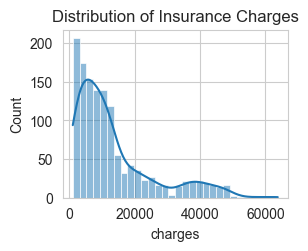

In [35]:
# Distribution of charges
plt.subplot(2, 2, 1)
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
# Histograms are effective for visualizing the distribution of numerical data (W3Schools, 2024)

*Visualise distribution of charges*


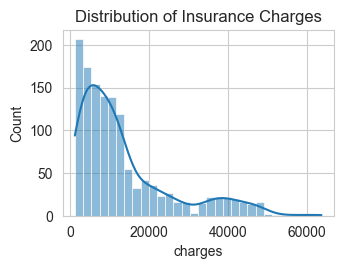

In [36]:
plt.subplot(2, 2, 1)
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.tight_layout()
plt.show()
# (W3Schools, 2024a)

*Age Distribution*

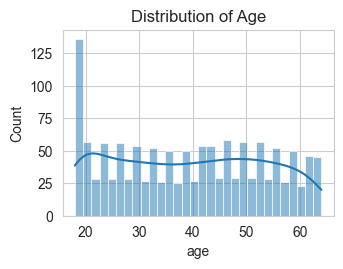

In [37]:
# Distribution of Age
plt.subplot(2, 2, 2)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

*BMI distribution*

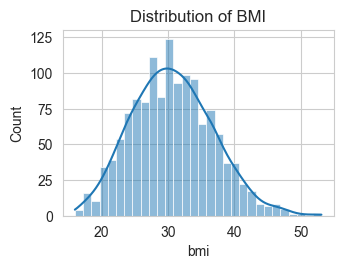

In [38]:
plt.subplot(2, 2, 3)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.tight_layout()
plt.show()

*Children Count*

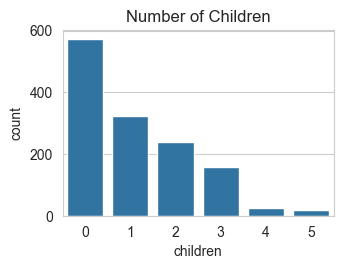

In [39]:
plt.subplot(2, 2, 4)
sns.countplot(x='children', data=df)
plt.title('Number of Children')
plt.tight_layout()
plt.show()

*Visualize distributions for categorical variables*

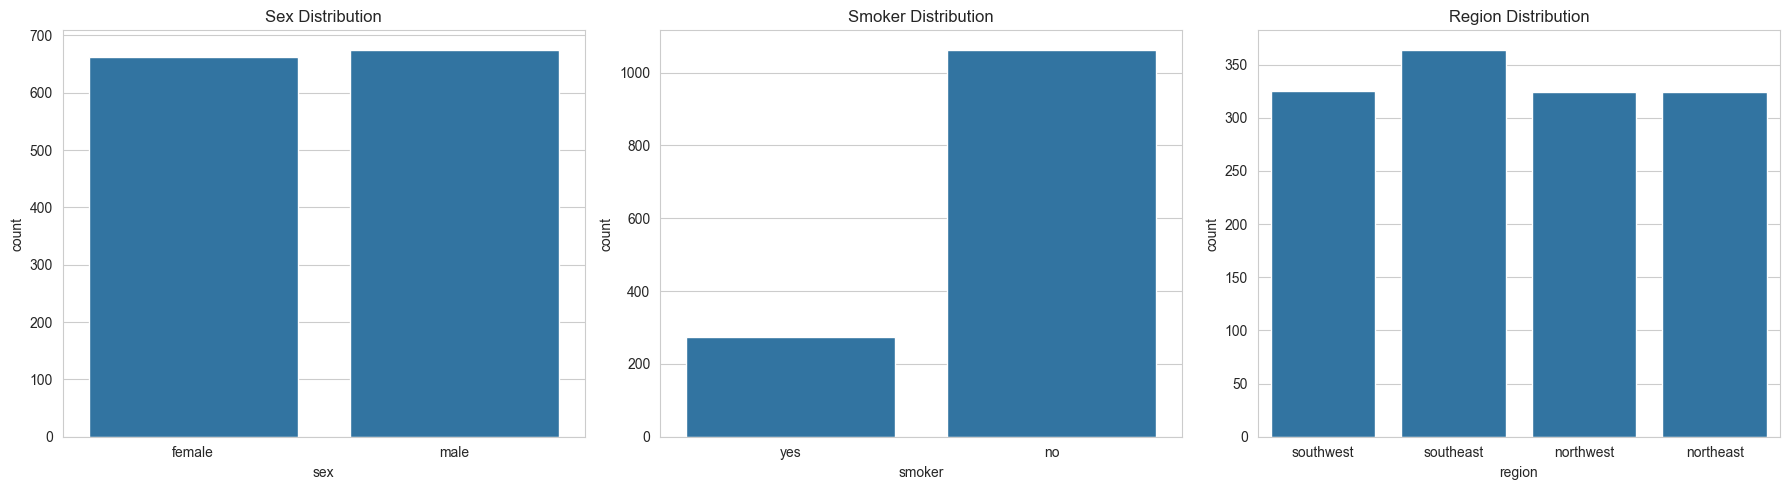

In [40]:
# Count plots effectively represent the distribution of categorical data (W3Schools, 2024b)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex', data=df, ax=axes[0])
axes[0].set_title('Sex Distribution')
sns.countplot(x='smoker', data=df, ax=axes[1])
axes[1].set_title('Smoker Distribution')
sns.countplot(x='region', data=df, ax=axes[2])
axes[2].set_title('Region Distribution')
plt.tight_layout()
plt.show()

*Feature relationships with charges*

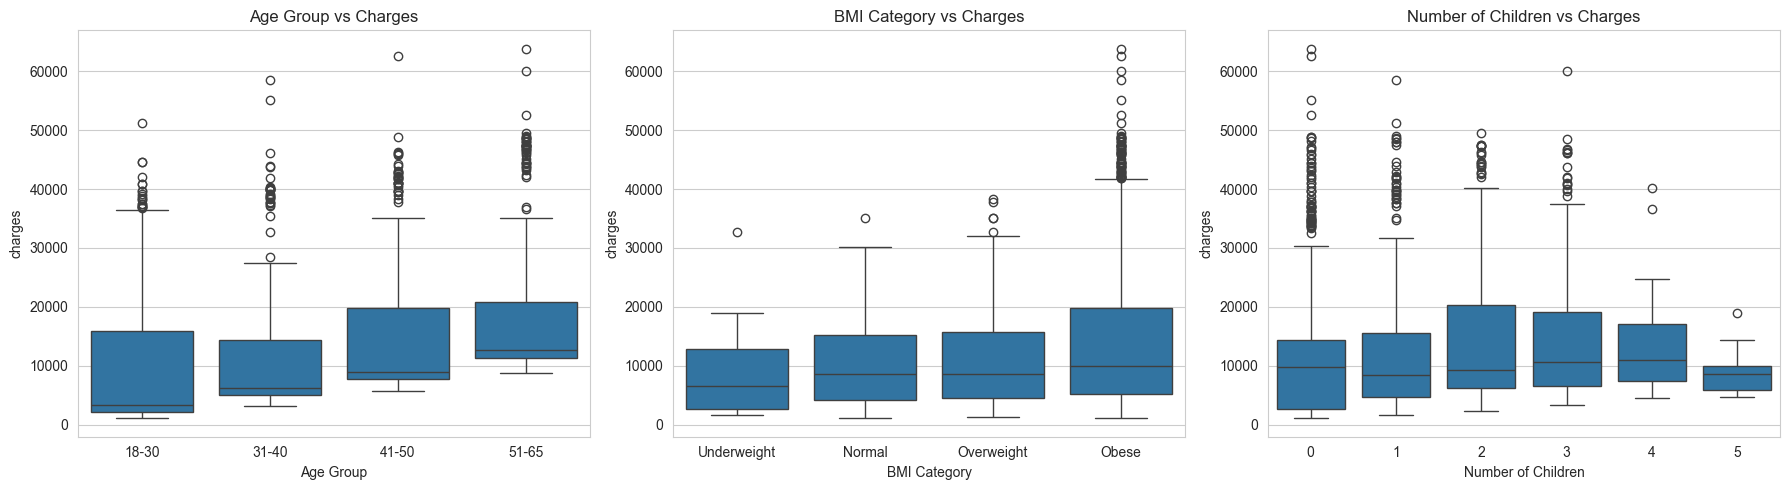

In [41]:
plt.figure(figsize=(18, 5))

# Convert age to categorical bins for boxplot
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 65], 
labels=['18-30', '31-40', '41-50', '51-65'])

# Create boxplots 
# these are useful for visualising the distribution and identifying outliers (Stack Overflow, 2019)
plt.subplot(1, 3, 1)
sns.boxplot(x='age_group', y='charges', data=df)
plt.title('Age Group vs Charges')
plt.xlabel('Age Group')

plt.subplot(1, 3, 2)
# Convert BMI to categorical bins (Stack Overflow, 2019)
df['bmi_category'] = pd.cut(df['bmi'], 
bins=[0, 18.5, 25, 30, 100], 
labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
sns.boxplot(x='bmi_category', y='charges', data=df)
plt.title('BMI Category vs Charges')
plt.xlabel('BMI Category')

plt.subplot(1, 3, 3)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Number of Children vs Charges')
plt.xlabel('Number of Children')

plt.tight_layout()
plt.show()

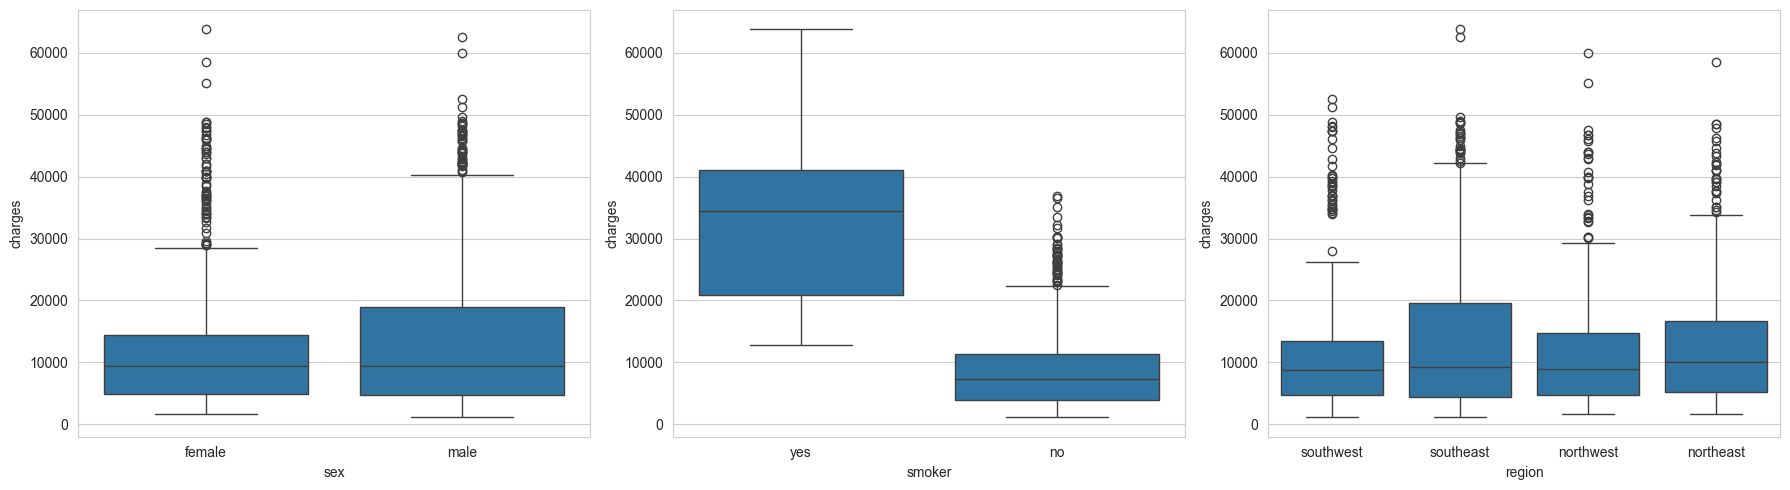

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0])
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1])
sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
plt.tight_layout()
plt.show()

*Correlation helps identify strong linear associations (W3Schools, 2024)*

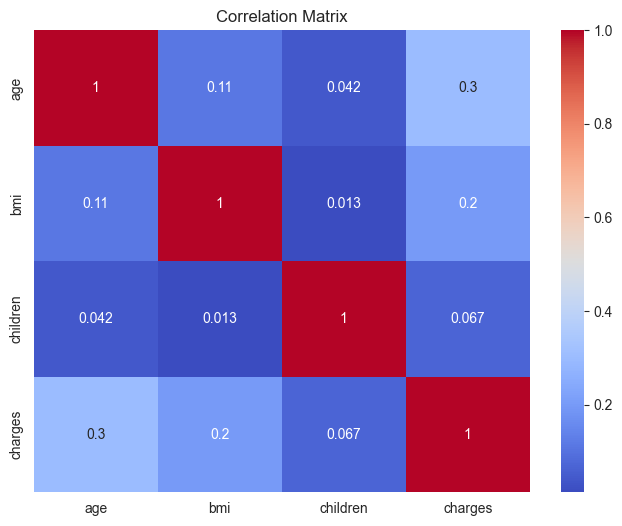

In [43]:
# Heatmaps are effective for visualising correlation matrices (W3Schools, 2024).
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

b. *Feature Selection extracting the best predictors*

In [44]:
# New features and ANOVA tests guide meaningful variable selection (Analytics Vidhya, 2024)
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 65], labels=['18-30', '31-40', '41-50', '51-65'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['smoker_bmi'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0) * df['bmi']

# ANOVA test for categorical variables
def anova_test(df, feature, target):
    groups = [df[df[feature] == cat][target] for cat in df[feature].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"ANOVA - {feature} vs {target}: F={f_val:.2f}, p={p_val:.4f}")

for feature in ['sex', 'smoker', 'region', 'age_group', 'bmi_category']:
    anova_test(df, feature, 'charges')



ANOVA - sex vs charges: F=4.51, p=0.0338
ANOVA - smoker vs charges: F=2175.74, p=0.0000
ANOVA - region vs charges: F=2.93, p=0.0328
ANOVA - age_group vs charges: F=39.95, p=0.0000
ANOVA - bmi_category vs charges: F=18.95, p=0.0000


*c. Train Model – train linear regression and apply pipeline*

In [45]:
# Pipeline ensures clean processing and reproducibility (Sklearn, 2024)
X = df.drop(['charges', 'age_group', 'bmi_category'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Using Pipeline to streamline preprocessing and modeling steps (Stack Overflow, 2015)
numeric_features = ['age', 'bmi', 'children', 'smoker_bmi']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
# Model 1: Basic Linear Regression + Interaction Terms
model = Pipeline(steps=[
    ('preprocessor', preprocessor),# Scales numeric + encodes categorical
    # Baseline linear model
    ('regressor', LinearRegression())])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### *4 A. Interpret and Evaluate the Model – metrics and visualizations*


Linear Regression:
R^2: 0.8862
MAE: $2828.97
RMSE: $4572.81


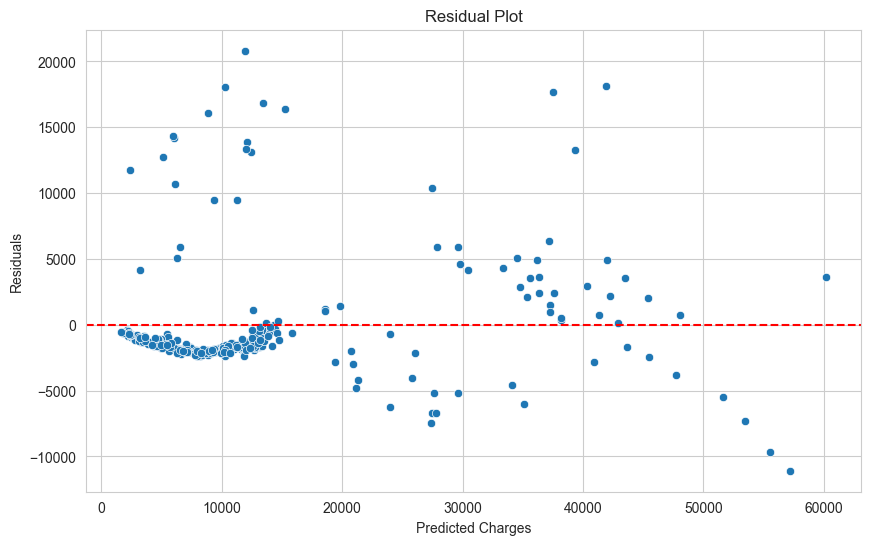

In [46]:
# Model evaluation through multiple metrics validates performance (Statology, 2024)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nLinear Regression:")
print(f"R^2: {r2:.4f}\nMAE: ${mae:.2f}\nRMSE: ${rmse:.2f}")

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

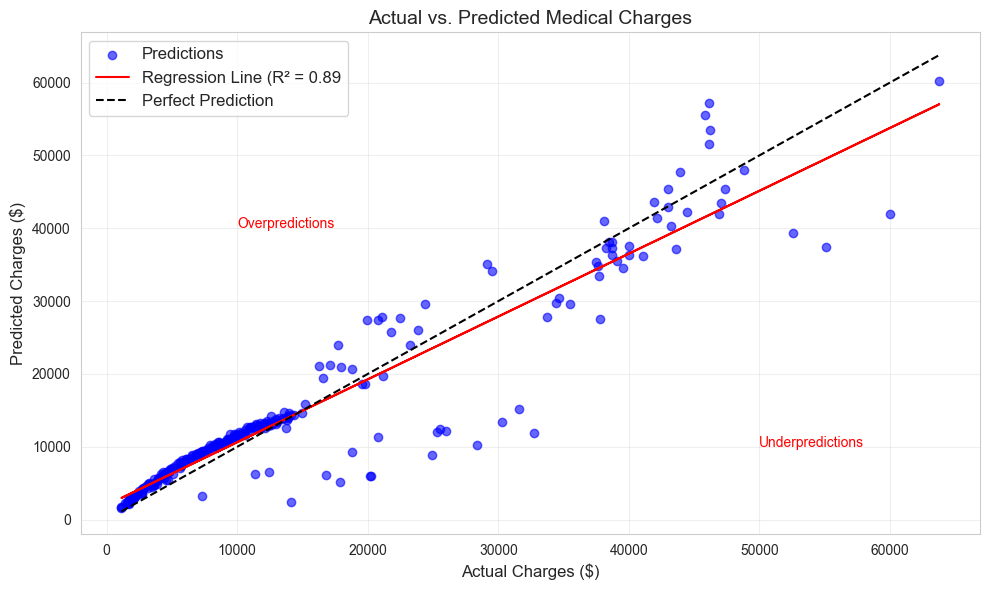

In [47]:
# Get predictions
y_pred = model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')

# Add regression line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', 
         label=f'Regression Line (R² = {r2_score(y_test, y_pred):.2f}')

# Add perfect prediction line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', label='Perfect Prediction')

# Formatting
plt.title('Actual vs. Predicted Medical Charges', fontsize=14)
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Highlight some key areas
plt.text(50000, 10000, 'Underpredictions', color='red', fontsize=10)
plt.text(10000, 40000, 'Overpredictions', color='red', fontsize=10)

plt.tight_layout()
plt.show()

### *4 B. Retrain with New Parameters – Lasso Regression & Interaction*

In [48]:
# Lasso adds regularization to prevent overfitting (GeeksforGeeks, 2024)
lasso_model = Pipeline(steps=[
    #Lasso Regression with Interactions
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("\nLasso Regression:")
print(f"R^2: {r2_lasso:.4f}\nMAE: ${mae_lasso:.2f}\nRMSE: ${rmse_lasso:.2f}")


Lasso Regression:
R^2: 0.8862
MAE: $2828.93
RMSE: $4572.67


##### 6. References (Harvard Style)

##### Kaggle (2024) *Medical Cost Personal Dataset*. Available at: https://www.kaggle.com/datasets/mirichoi0218/insurance (Accessed: 19 April 2025).
##### IBM (2024) *What is data preprocessing?*. Available at: https://developer.ibm.com/articles/data-preprocessing-in-detail/?mhsrc=ibmsearch_a&mhq=data%20preprocessing (Accessed: 19 April 2025).
##### Scikit-learn (2024) *Linear models*. Available at: https://scikit-learn.org/stable/modules/linear_model.html (Accessed: 21 April 2025).
##### DataCamp (2024) *Exploratory Data Analysis in Python*. Available at: https://www.datacamp.com/tutorial/exploratory-data-analysis-python (Accessed: 21 April 2025).
##### Analytics Vidhya (2024) *Feature Selection Techniques in Machine Learning*. Available at: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/ (Accessed: 21 April 2025).
##### GeeksforGeeks (2024) *Lasso Regression in Python*. Available at: https://www.geeksforgeeks.org/implementation-of-lasso-regression-from-scratch-using-python/ (Accessed: 21 April 2025).
##### Statology (2024) *How to Interpret Regression Results*. Available at: https://www.statology.org/how-to-use-the-python-statistics-linear_regression-function/ (Accessed: 21 April 2025).
##### Stack Overflow (2019) Understanding Seaborn Boxplot With Examples. Available at: https://stackoverflow.com/questions/54752856/understanding-seaborn-boxplot-with-examples (Accessed: 25 April 2025).
##### W3Schools (2024) Matplotlib Histograms. Available at: https://www.w3schools.com/python/matplotlib_histograms.asp (Accessed: 25 April 2025).
##### W3Schools (2024) Pandas - Plotting. Available at: https://www.w3schools.com/python/pandas/pandas_plotting.asp (Accessed: 25 April 2025).
##### W3Schools (2024) Matplotlib Tutorial. Available at: https://www.w3schools.com/python/matplotlib_intro.asp (Accessed: 25 April 2025).
##### Stack Overflow (2015) What is exactly sklearn.pipeline.Pipeline?. Available at: https://stackoverflow.com/questions/33091376/what-is-exactly-sklearn-pipeline-pipeline (Accessed: 20 April 2025).
##### Stack Overflow (2015) What is exactly sklearn.pipeline.Pipeline?. Available at: https://stackoverflow.com/questions/33091376/what-is-exactly-sklearn-pipeline-pipeline (Accessed: 20 April 2025).
